In [1]:
import datetime as dt
import glob
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import pandas as pd
import xarray as xr

In [2]:
def read_h5(year):
    this_dir = os.getcwd()
    L3_SM_P_dir = os.path.join(this_dir, 'data/L3_SM_P/')
    flist = glob.glob(os.path.join(L3_SM_P_dir, f'*{year}*.h5'))
    return flist

In [38]:
def read_SML3P(filepath):
    ''' This function extracts lat, lon and soil moisture from SMAP L3 P HDF5 file.
    
    Parameters
    ----------
    filepath : str
        File path of a SMAP L3 HDF5 file
    Returns
    -------
    soil_moisture_am: numpy.array
    '''    
    with h5py.File(filepath, 'r') as f:
        # Extract data info
        group_id_am = 'Soil_Moisture_Retrieval_Data_AM'
        var_id_am = 'soil_moisture'
        flag_id_am = 'retrieval_qual_flag'
        soil_moisture_am = f[group_id_am][var_id_am][:,:]
        flag_am = f[group_id_am][flag_id_am][:,:]
        soil_moisture_am[soil_moisture_am==-9999.0]=np.nan
        soil_moisture_am[(flag_am>>0)&1==1]=np.nan
        filename = os.path.basename(filepath)
        yyyymmdd= filename.split('_')[4]
        yyyy = int(yyyymmdd[0:4]);        mm = int(yyyymmdd[4:6]);        dd = int(yyyymmdd[6:8])
        date=dt.datetime(yyyy,mm,dd)
    return soil_moisture_am,date


In [31]:
def visualize_map_by_year(year):
    flist = read_h5(year)
    filename = flist[0]
    f = h5py.File(filename, 'r')
    group_id=list(f.keys())[1] 
    var_id = list(f[group_id].keys())[26] # soil_moisture
    sm_data = f[group_id][var_id][:,:]
    sm_data[sm_data==f[group_id][var_id].attrs['_FillValue']]=np.nan;
    sm_data_3d = np.empty([sm_data.shape[0],sm_data.shape[1],len(flist)])
    i=0
    for fName in flist:
        sm_data_3d[:,:,i],time_i = read_SML3P(fName)
        i+=1
    sm_mean = np.nanmean(sm_data_3d,2)
    plt.title(year)
    m = Basemap(projection= 'cyl', llcrnrlat=40,urcrnrlat=46,llcrnrlon=65,urcrnrlon=75)
    m.drawcoastlines()
    m.imshow(sm_mean,vmin=0.,vmax=0.55,cmap='terrain_r')
    cbar = plt.colorbar(orientation='horizontal')
    cbar.set_label('$cm^3 cm^{-3}$')

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


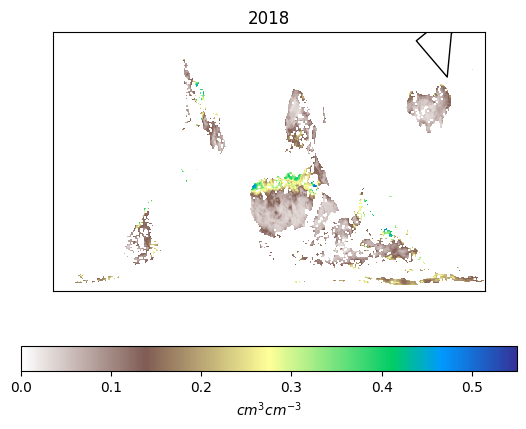

In [32]:
visualize_map_by_year(2018)

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


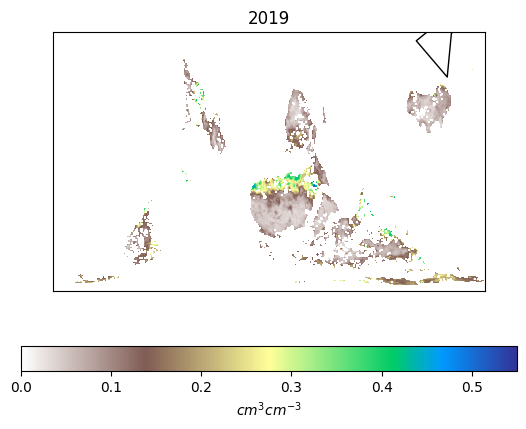

In [33]:
visualize_map_by_year(2019)

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


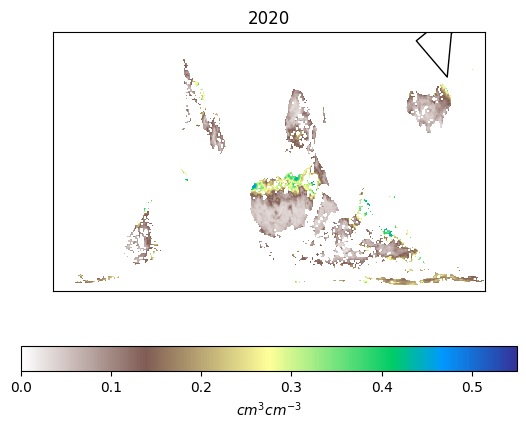

In [34]:
visualize_map_by_year(2020)

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


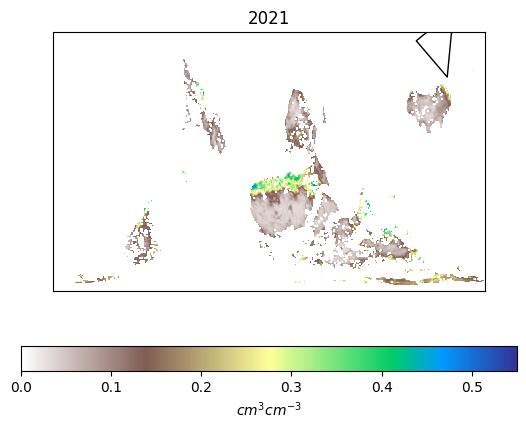

In [35]:
visualize_map_by_year(2021)

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


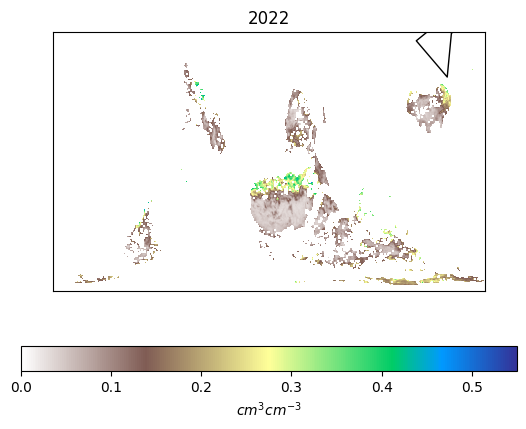

In [36]:
visualize_map_by_year(2022)

/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/3206543785.py:14: RuntimeWarning: Mean of empty slice
  sm_mean = np.nanmean(sm_data_3d,2)


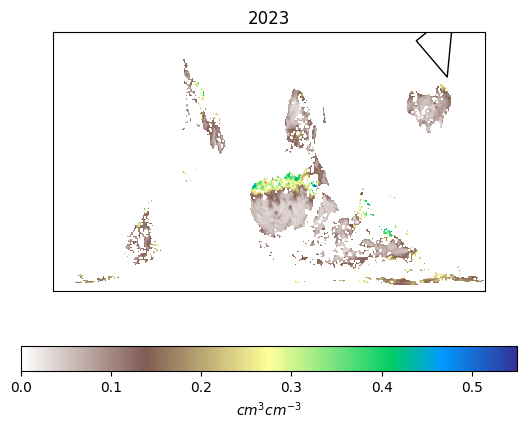

In [37]:
visualize_map_by_year(2023)

sm_data_3d has dimensions (406, 964, 161)


/var/folders/8g/v086443d7w9d5ddqfm7z7s1w0000gn/T/ipykernel_9734/213916318.py:34: RuntimeWarning: Mean of empty slice
  sm_time[i] = np.nanmean(sm_2d[subset]);


Text(0.5, 1.0, 'Soil Moisture')

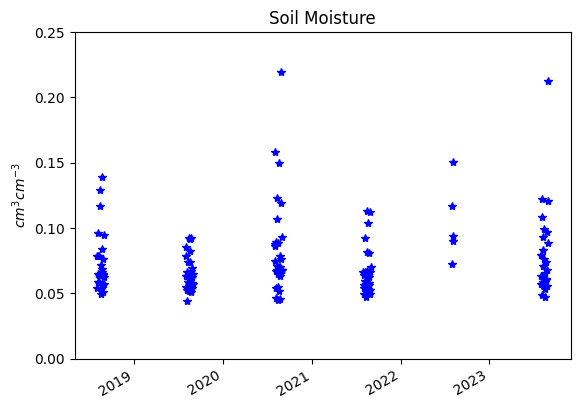

In [39]:
this_dir = os.getcwd()
L3_SM_P_dir = os.path.join(this_dir, 'data/L3_SM_P/')
flist = glob.glob(os.path.join(L3_SM_P_dir, f'*.h5'))
filename = flist[0]
f = h5py.File(filename, 'r')
group_id=list(f.keys())[1] 
var_id = list(f[group_id].keys())[26] # soil_moisture
sm_data = f[group_id][var_id][:,:]
sm_data[sm_data==f[group_id][var_id].attrs['_FillValue']]=np.nan
sm_data_3d = np.empty([sm_data.shape[0],sm_data.shape[1],len(flist)])
sm_data_3d = np.empty([sm_data.shape[0],sm_data.shape[1],len(flist)])
times = []
print('sm_data_3d has dimensions '+str(sm_data_3d.shape))
i=0
for fName in flist:
    sm_data_3d[:,:,i],time_i = read_SML3P(fName)
    times.append(time_i)
    i+=1

N_lat = 46
S_lat = 42
W_lon = 65
E_lon = 75

lats = np.fromfile('EASE2_M36km.lats.964x406x1.double', 
                      dtype=np.float64).reshape((406,964))
lons = np.fromfile('EASE2_M36km.lons.964x406x1.double', 
                      dtype=np.float64).reshape((406,964))

subset = (lats<N_lat)&(lats>S_lat)&(lons>W_lon)&(lons<E_lon)
sm_time = np.empty([len(flist)]);
for i in np.arange(0,sm_data_3d.shape[2]):
    sm_2d = sm_data_3d[:,:,i]
    sm_time[i] = np.nanmean(sm_2d[subset]); 

smData = {'sm':sm_time}
sm = pd.DataFrame(smData)
sm['time']=times
sm=sm.set_index('time')
fig, ax1 = plt.subplots()
ax1.plot(sm.index, sm, 'b*')       
ax1.set_ylim([0,0.25])
fig.autofmt_xdate()
ax1.set_ylabel('$cm^3 cm^{-3}$')
plt.title('Soil Moisture')